## Trigger codes for LSL and parallel
|event|	START| END |
|-----|------|-----|
|start screen |   10|11|
|end screen	  |  20|21|
|continue screen	|30|31|
|trial	       | 1|101|
|fc	       |     40|41|
|stim	     |   50|51|
|cue_l     |  	60|61|
|cue_r     |  	70|71|
|cue_c     |  	80|81|

# Imports

In [2]:
import pandas as pd
import numpy as np
import mne

# Read participant data

In [11]:
# Specify the path to your BrainVision data
data_path = 'm_01_01/'

# Load the data
raw = mne.io.read_raw_brainvision(data_path + 'm_01_01_pos1a.vhdr', preload=True)

# Print basic information about the data
# print(raw.info)


# Optionally crop and resample just to reduce computation time
resample=False
if resample:
    raw.crop(120, 360).load_data().resample(200)
else:
    pass


Extracting parameters from m_01_01/m_01_01_pos1a.vhdr...
Setting channel info structure...
Reading 0 ... 860939  =      0.000 ...   860.939 secs...


/var/folders/2b/4tnqzv_x3x17pf4q1_n7m8h40000gn/T/ipykernel_57680/2689071199.py:5: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision(data_path + 'm_01_01_pos1a.vhdr', preload=True)
/var/folders/2b/4tnqzv_x3x17pf4q1_n7m8h40000gn/T/ipykernel_57680/2689071199.py:5: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision(data_path + 'm_01_01_pos1a.vhdr', preload=True)


# Analysis

In [4]:
events = mne.find_events(raw, stim_channel="P5")

In [5]:
# Define the channel types
channel_types = {'EEG': 'eeg', 'EOG': 'eog'}

# Select the channels of interest using pick_types
picks = mne.pick_types(raw.info, eeg=True, eog=True)

# Specify the event file (.vmrk) to extract stimulation events
events = mne.events_from_annotations(raw)

# Define the event IDs and time range for epochs
event_id = {'StimulusOn': 50, 'StimulusOff': 51}

tmin = -0.5  # Start time before event onset
tmax = 1.0  # End time after event onset


Used Annotations descriptions: ['New Segment/', 'Stimulus/S 10', 'Stimulus/S 30', 'Stimulus/S 40', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 60', 'Stimulus/S 70', 'Stimulus/S 80', 'Stimulus/S101', 'Stimulus/S109', 'Stimulus/S111']


In [6]:
epochs = mne.Epochs(raw, events[0], event_id, tmin, tmax, picks=picks, preload=True)

Not setting metadata
200 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 200 events and 1501 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/Users/babe/src/gla/dissertation/init_data_exploration/nfb_analysis_env/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


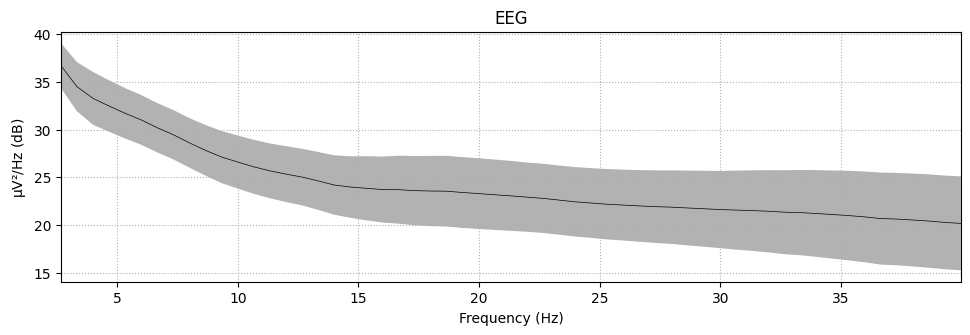

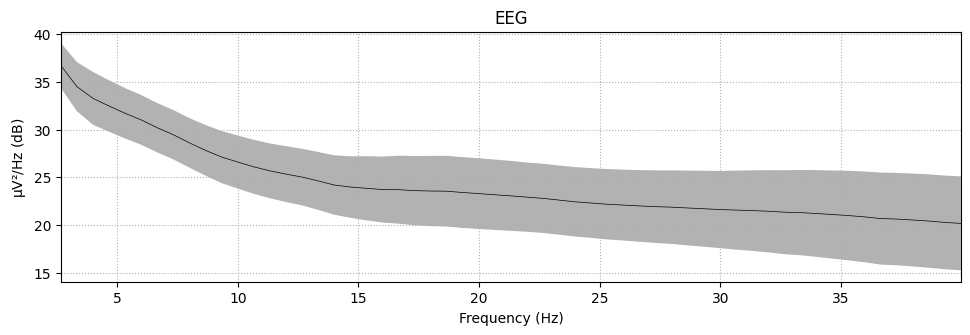

In [7]:
epochs.compute_psd(fmin=2.0, fmax=40.0).plot(average=True, picks="data", exclude="bads")

# PSD
Spatial distributions of the PSD, averaged across epochs and frequency bands.


    Using multitaper spectrum estimation with 7 DPSS windows


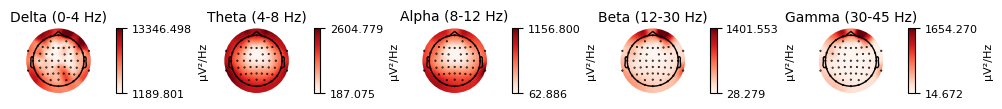

In [8]:
epochs.compute_psd().plot_topomap(ch_type="eeg", normalize=False, contours=0, show=False)

# Time frequency analysis

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


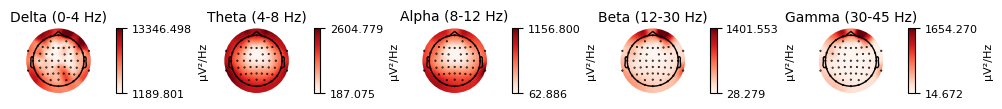

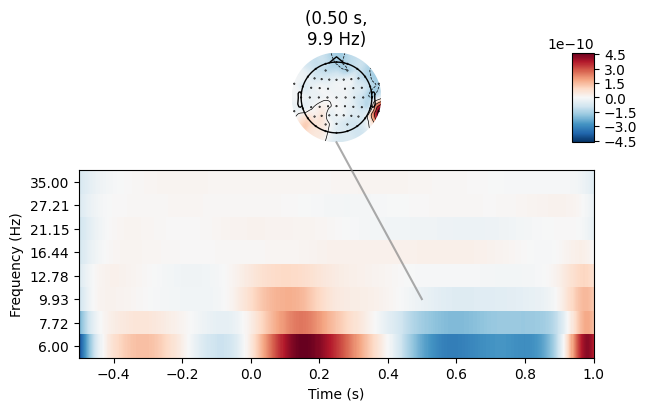

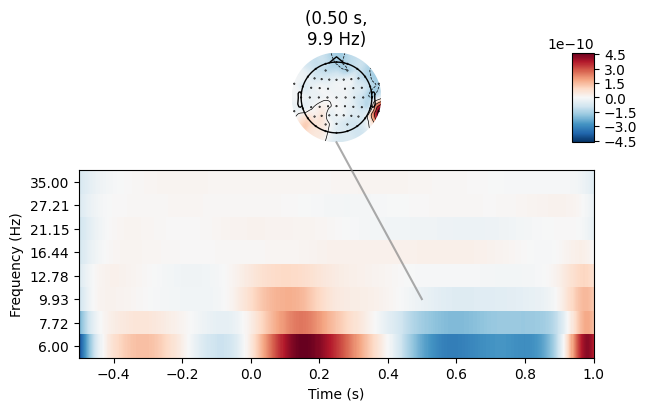

In [9]:
freqs = np.logspace(*np.log10([6, 35]), num=8)
n_cycles = freqs / 2.0  # different number of cycle per frequency
power, itc = mne.time_frequency.tfr_morlet(
    epochs,
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    decim=3,
    n_jobs=None,
)

_timefreqs=None
_timefreqs=[(0.5, 10)]

power.plot_joint(
    baseline=(-0.5, 0), mode="mean", tmin=-0.5, tmax=2, timefreqs=_timefreqs
)

In [50]:
# close the data file
raw.close()